In [1]:
import quanguru as qg

# QuanGuru uses sparse matrices by default, 
# but sparse matrices are not easily readable when we print them
# so, in below examples, we use .A to print them as arrays

# 2 - Hamiltonian of a quantum system

This tutorial demonstrates how to describe the Hamiltonian of a quantum system in QuanGuru.

In this example, we use the `QuantumSystem` object to create a quantum system and describe the desired Hamiltonian.

## Single Term
Let's start with a very simple (single qubit) Hamiltonian

$H = \frac{1}{2}f_{z}\sigma_{z}$

Here, the *relevant* information are

- frequency : $\frac{1}{2}f_{z}$ (say 0.5 where $f_{z} = 1$)
- operator : $\sigma_{z}$
- dimension : 2

and, we create a quantum system with this Hamiltonian as below

In [2]:
# note that you don't have to specify all these information at instantiation,
# but, if you are using QuantumSystem class, it is required that you at least specify one of them.
qs = qg.QuantumSystem(frequency=0.5, operator=qg.sigmaz, dimension=2)

# print the freeMat of the system, which is just the bare matrix for the operator
print(qs.freeMat.A)
# print the total-Hamiltonian of the system
print(qs.totalHam.A)

[[ 1  0]
 [ 0 -1]]
[[ 0.5  0. ]
 [ 0.  -0.5]]


Notice that the `operator` of the `QuantumSystem` is the function `qg.sigmaz` (from `QuantumToolbox`), and it does not have the parenthesis  `qg.sigmaz()`, which would invoke/call the functino to create the matrix form of the operator. Make sure to pass the function without the parenthesis. The `QuantumSystem` objects call these functions in the background to create the matrices, and the reason for passing the function but not the matrix is that the function may need to be called more than once (in the background) in certain cases, such as dimension sweeps (covered in later tutorials).

## Qubit object as a special case

For common quantum systems, such as qubit, higher spins, or cavity, we have special classes, and these classes just set some of the information internally to certain default values.
For example, `Qubit` class internally defaults `dimension = 2` and `operator = qg.Jz`, which also takes care of the $\frac{1}{2}$ factor, meaning we can simply set the frequency $f_{z} = 1$.

In [3]:
qub = qg.Qubit(frequency=1)

# note that Jz differs by a factor of 0.5
print(qub.freeMat.A)
# print the totalHamiltonian of the system
print(qub.totalHam.A)

[[ 0.5  0. ]
 [ 0.  -0.5]]
[[ 0.5  0. ]
 [ 0.  -0.5]]


## Multiple terms

Now, let's consider a more general case where we have more terms in the Hamiltonian, for example the below Hamiltonian with two terms

$H = \frac{1}{2}\omega_{z}\sigma_{z} + \omega_{x}\sigma_{x}$

In this case, we can add a term to our quantum system using the `addTerm` method, which takes the operator (in this case $\sigma_{x}$) and the frequency (in this case $\omega_{x}$ say = 1) as inputs.
We can, of course, add as many terms as we want.

Let's use the first quantum system `qs` that we created for the rest.

In [4]:
# add term method returns an object for term
# again note that the operator is the function qg.sigmax not the function call qg.sigmax()
secondTerm = qs.addTerm(operator=qg.sigmax, frequency=1)
# actually, the quantum systems create an internal term for their first term
# and, we can reach the object itself
firstTerm = qs.firstTerm

# Now the freeMat is still the operator of the first term that we added
print(qs.freeMat.A)
# but the totalHam is the summation of all the terms 
print(qs.totalHam.A)
# and individual terms contain/create the matrix corresponding to their operator
print(firstTerm.freeMat.A, secondTerm.freeMat.A, sep='\n')

[[ 1  0]
 [ 0 -1]]
[[ 0.5  1. ]
 [ 1.  -0.5]]
[[ 1  0]
 [ 0 -1]]
[[0 1]
 [1 0]]


As shown above, the terms of the Hamiltonian are also implemented as individual objects.
The advantage of this approach is that we can individually address/set/update each terms, operator, frequency, and order (see below), making it them easier to sweep (covered in later tutorials).
Also note that, as long as we use a single term, we don't need to access/modify the first term directly, because the quantum system objects acts like their first term.

In [5]:
# changing the frequency of the first term through the qs
qs.frequency = 2
print(firstTerm.totalHam.A) # this returns the frequency*operator (in this case, 2*sigmax())

# above is equivalent short hand to
firstTerm.frequency = 1
print(firstTerm.totalHam.A) # this returns the frequency*operator (in this case, 1*sigmax())

# we can also change operator of a term, and let's change the second term to sigmay
secondTerm.operator = qg.sigmay
print(secondTerm.totalHam.A) # this returns the frequency*operator (in this case, 1*sigmay())

# lets set it back to sigmax and verify
secondTerm.operator = qg.sigmax
print(secondTerm.totalHam.A) # this returns the frequency*operator (in this case, 1*sigmay())

[[ 2  0]
 [ 0 -2]]
[[ 1  0]
 [ 0 -1]]
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
[[0 1]
 [1 0]]


## Non-linear terms

In certain Hamiltonians, we might have a non-linear term where the operator is raised to a certain power.
For Pauli matrices, $\sigma_{i}^{2} = 1$ (i.e. the identity matrix) for $i \in \{x,y,z\}$, but, just for the sake of an example say we have the following Hamiltonian

$H = \frac{1}{2}\omega_{z}\sigma_{z} + \omega_{x}\sigma_{x} + \omega_{y}\sigma_{y}^{2}$

Now, we can add another term to our quantum system, just as we did for $\sigma_{x}$ term, but this time with an additional input parameter, namely `order`, to the `addTerm` method.

In [6]:
thirdTerm = qs.addTerm(operator=qg.sigmay, frequency=2, order=2)

# Now the freeMat is still the operator of the first term that we added
print(qs.freeMat.A)
# but the totalHam is the summation of all the terms
print(qs.totalHam.A)
# matrix of the third term is the matrix corresponding to operator (sigmay) raised to the order
print(thirdTerm.freeMat.A)
# the total-Hamiltonian of the term
print(thirdTerm.totalHam.A)

[[ 1  0]
 [ 0 -1]]
[[3.+0.j 1.+0.j]
 [1.+0.j 1.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j]]


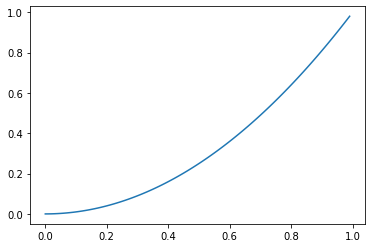

In [7]:
# THIS IS A DUMMY PLOT FOR THE THUMBNAIL IN DOCUMENTATION WEBSITE

import matplotlib.pyplot as plt
plt.plot([i/100 for i in range(100)], [(i/100)**2 for i in range(100)])